<a href="https://colab.research.google.com/github/jake7snyder/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Replication_of_LS_DS_113_Join_and_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

**Always start with imports**

In [2]:
# These will be your typical imports for just about any pandas project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Part 1: Simple Examples 

### 1.1 Concatenate
Concatenate sticks dataframes together, either on top of each other, or next to each other.

First, let's create two dataframes, `df1` and `df2`.

In [3]:
# Create df1
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [4]:
# Create df2
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [6]:
# Next, let's stick the dataframes on top of each other using `concat`.
# `axis=0` indicates a row operation. Note that 'axis=0' is the default and doesn't have to be specified.
df3 = pd.concat([df1, df2], axis=0)
df3.head()

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [7]:
# Finally, let's stick the dataframes next to each other using `concat`. 
# Here, `axis=1` indicates a column operation.
df4 = pd.concat([df1, df2], axis=1)
df4.head()

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


### 1.2 Merge

Merging joins two datasets together based on a common key.

In [9]:
# stock names
stock_dict = {'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']}
stocknames = pd.DataFrame(stock_dict)
stocknames

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [10]:
# stock prices.
prices = {'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]}
pricenames = pd.DataFrame(prices)
pricenames

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [13]:
# Merge these dataframes.
named_stocks = pd.merge(pricenames, stocknames)
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [14]:
# Create a 3rd dataset of weekly highs
high = {'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]}
wkhigh = pd.DataFrame(high)
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


The 'on' parameter indicates a specific column that is contained in both dataframes. We use it to look up and copy information from the two df's into a combined df.

In [15]:
# Now merge that with the named stocks.
full_stocks=pd.merge(named_stocks, wkhigh, how='outer')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49
5,NFLX,NaN,NaN,303.22


The 'how' parameter indicates what the portion of the selected dataframes to keep after the merge takes place.  
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

In [17]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

### 1.3 Reshape: `melt` and `pivot_table`



Why reshape data?

**Some libraries prefer data in different formats**



> For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).  
[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets)    
This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

Data science is often about putting square pegs in round holes. Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

**Hadley Wickham: 'wide' format vs. 'tidy' format**  
From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [18]:
# Let's create a simple table.

myindex=['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']

table1 = pd.DataFrame(
    [[np.nan,2],
     [16,11],
     [3, 1]],
     index=myindex,
     columns=mycolumns
)

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild.   
The table has two columns and three rows, and both rows and columns are labelled."

In [19]:
# This is an example of 'wide' format:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data.   
Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [20]:
# Exactly the same information can be displayed by transposing the table. 
# (this is also another form of 'wide' format)
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


Table 3 is an example of 'tidy' format. It reorganises Table 1  to make the values, variables and obserations more clear.

Table 3 is the 'tidy' version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

**Table 1 --> Tidy**

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [22]:
# First, get the column names as a list.
table1.columns.to_list()

['treatmenta', 'treatmentb']

In [24]:
# Now get the index values as another list.
table1.index.to_list()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [26]:
# For table 1, convert the index into a column using the `reset_index` method.
table1 = table1.reset_index()
table1

,level_0,index,treatmenta,treatmentb
0,0,John Smith,NaN,2
1,1,Jane Doe,16.0,11
2,2,Mary Johnson,3.0,1


In [27]:
# Convert the table from 'wide' to 'tidy' format using the `melt` method.
tidy1 = table1.melt(id_vars = 'index', value_vars = ['treatmenta', 'treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [28]:
# rename the columns
tidy1 = tidy1.rename(columns={'index': 'name', 
                              'variable': 'trt',
                              'value': 'result'})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [29]:
# shorten the `trt` values
tidy1['trt'] = tidy1['trt'].str.replace('treatment', '')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


**Table 2 --> Tidy**

In [38]:
##### LEAVE BLANK --an assignment exercise #####

table2 = table2.reset_index()
tidy2 = table2.melt(id_vars = 'index', value_vars = ['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


**Tidy --> Table 1**

The `pivot_table` function is the inverse of `melt`.

In [39]:
# Let's do it all in reverse.
wide1 = tidy1.pivot(index='name', columns='trt', values='result')
wide1

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


**Tidy --> Table 2**

In [40]:
##### LEAVE BLANK --an assignment exercise #####

wide2 = tidy2.pivot(index='index', columns='variable', values='value')
wide2

variable,Jane Doe,John Smith,Mary Johnson
index,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


**Seaborn example**

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

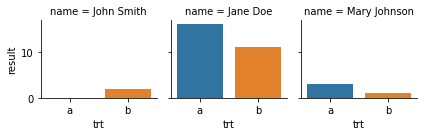

In [42]:
# Plot this using seaborn

sns.catplot(data = tidy1,
            x = 'trt',
            y = 'result',
            col = 'name',
            kind = 'bar',
            height = 2);

## Part 2: More complex examples 

### 2.1 Concatenating time-series datasets from Chicago

In [43]:
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [44]:
# Let's take a look at the first quarter.
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [45]:
# how about the second quarter?
q2 = pd.read_csv(q2_path)
print(q2.shape)
q2.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [46]:
# Do they have exactly the same columns?
print(q1.columns)
(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [48]:
# Now we're sure they're equal, let's concatenate them.
q1_2 = pd.concat([q1, q2])
print(q1_2.shape)
q1_2.head()

(2000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [49]:
# Now add quarters 3 and 4, as well.
q3 = pd.read_csv(q3_path)
q4 = pd.read_csv(q4_path)
total = pd.concat([q1, q2, q3, q4])
total.shape

(4000, 12)

### 2.2 Merging datasets about counties
Original sources:  
https://www.kaggle.com/muonneutrino/us-census-demographic-data/download  
https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/

In [50]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [60]:
# Read that into Pandas, and check out 5 rows.

df = pd.read_csv(source1)

In [61]:
df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [62]:
# What are all the columns?
df.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [65]:
# Let's restrict that to just a few columns, for a simple analysis about commute times
df2 = df[['CountyId', 'State', 'County', 'MeanCommute']]
df2.head()

,CountyId,State,County,MeanCommute
0,1001,Alabama,Autauga County,25.8
1,1003,Alabama,Baldwin County,27.0
2,1005,Alabama,Barbour County,23.4
3,1007,Alabama,Bibb County,30.0
4,1009,Alabama,Blount County,35.0


In [68]:
# What's the average commute in the USA?
df2['MeanCommute'].mean()

23.47453416149071

In [69]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [70]:
# Take a look at that new data.
df3 = pd.read_excel(source2)
print(df3.shape)
df3.head()

(3221, 6)


,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
0,1001,AL,Autauga County,54571,2,"Metro - Counties in metro areas of 250,000 to ..."
1,1003,AL,Baldwin County,182265,3,Metro - Counties in metro areas of fewer than ...
2,1005,AL,Barbour County,27457,6,"Nonmetro - Urban population of 2,500 to 19,999..."
3,1007,AL,Bibb County,22915,1,Metro - Counties in metro areas of 1 million p...
4,1009,AL,Blount County,57322,1,Metro - Counties in metro areas of 1 million p...


In [73]:
# What are those RUCC codes all about?
df3['RUCC_2013'].value_counts().sort_index()
df3['Description'].value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                                                                                                                                    597
Metro - Counties in metro areas of 1 million population or more                                                                                                                                             472
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                                                                                                                                434
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area                                                                                                               425
Metro - Counties in metro areas of 250,000 to 1 million population                                                                                                      

In [74]:
# Let's shrink that USDA data to just the columns we need.
df3 = df3[['FIPS', 'County_Name', 'RUCC_2013']].copy()
df3.head()

,FIPS,County_Name,RUCC_2013
0,1001,Autauga County,2
1,1003,Baldwin County,3
2,1005,Barbour County,6
3,1007,Bibb County,1
4,1009,Blount County,1


In [78]:
# Let's merge that with our census data about commute times.
df4 = pd.merge(df2, df3, left_on = 'CountyId', right_on='FIPS', how='inner')
print(df2.shape)
print(df3.shape)
print(df4.shape)

(3220, 4)
(3221, 3)
(3218, 7)


In [79]:
# Is there any difference in commutes by rural-urban designation?

df4.groupby('RUCC_2013')[['MeanCommute']].mean()

,MeanCommute
RUCC_2013,
1,29.513347
2,24.721066
3,22.864499
4,22.332258
5,18.686957
6,23.877013
7,19.532488
8,25.707727
9,20.113679


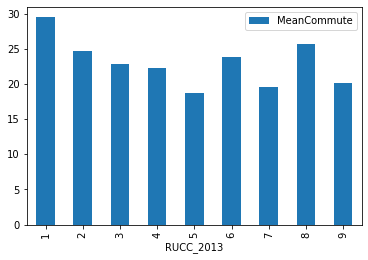

In [80]:
# Display that using the Pandas plotting function.
df4.groupby('RUCC_2013')[['MeanCommute']].mean().plot(kind='bar')

## Part 3. Real-word Examples

### 3.1. Instacart  Dataset: `pd.concat` and `pd.merge`

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [81]:
# bash command: get a compressed file in 'tarball' format (this is similar to a .zip file)
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-07-15 02:50:04--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.109
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.6MB/s    in 14s     

2020-07-15 02:50:19 (14.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [82]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [88]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).
!cd instacart_2017_05_01

In [89]:
# bash command: list the contents of that folder.

!ls

instacart_2017_05_01				     sample_data
instacart_online_grocery_shopping_2017_05_01.tar.gz


**Goal: Reproduce this example**

The first two orders for user id 1:

In [90]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

#### Load data

Here's a list of all six CSV filenames

In [91]:
# List the contents of the cwd.



/bin/bash: cwd: command not found


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

In [92]:
# Read in the aisles dataset. Do we need anything from here? No, we don't.

aisles = pd.read_csv('instacart_2017_05_01/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [94]:
# Read in the departments dataset. Do we need anything from here? Nope.

departments = pd.read_csv('instacart_2017_05_01/departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [97]:
# How about order_products? We need everything from this table except for reordered.

order_products__prior = pd.read_csv('instacart_2017_05_01/order_products__prior.csv')
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [98]:
# How is this differen from the previous one? Same as above.
# This file indicates a user's most recent order.
# the suffix '__train' vs '__prior' indicates it's been split for machine learning (train-test split)
# Given a user's order history, can you predict what they'll order next.

order_products__train = pd.read_csv('instacart_2017_05_01/order_products__train.csv')
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [99]:
# How is this one different? Does it have anything we need?
# We need most of these columns, except 'days_since_prior_order' and 'eval_set'

orders = pd.read_csv('instacart_2017_05_01/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [100]:
# And products? We need 'product_name' and 'product_id'

products = pd.read_csv('instacart_2017_05_01/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [101]:
display(example)

#### Filtering: Get a subset of orders

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [102]:
# let's look at the `orders` dataframe.
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [103]:
# let's filter this dataframe to just the columns we need.
cols=['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders = orders[cols]
orders.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15


In [104]:
# Now let's filter it to only certain rows. This will result in a series of boolean values.

cond = (orders['user_id']==1)

In [105]:
# Apply that condition to the orders dataframe.

orders[cond]

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15
5,1,3367565,6,2,7
6,1,550135,7,1,9
7,1,3108588,8,1,14
8,1,2295261,9,1,16
9,1,2550362,10,4,8


In [106]:
# a more complicated condition.

condition = (orders['user_id']==1) & (orders['order_number']<=2)

In [108]:
# Turn that filtered dataframe into its own dataframe.

orders2 = orders[condition]
orders2

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


#### Concatenate order_products__prior and order_products__train

In [110]:
# check out their shape.

print(order_products__prior.shape)
order_products__train.shape

(32434489, 4)


(1384617, 4)

In [111]:
# concatenate them together

order_products = pd.concat([order_products__prior, order_products__train], axis=0)
order_products.shape

(33819106, 4)

In [112]:
# Get a subset of `order_products` -- slim down this large dataset to only what I need (only 2 orders). 

cond2 = (order_products['order_id']==2539329) | (order_products['order_id']==2398795)

In [113]:
# Make a selection of columns

mycols = ['order_id', 'add_to_cart_order', 'product_id']

In [115]:
# Use the .loc method to filter rows and columns in a single blow.

order_products2 = order_products.loc[cond2, mycols]

#### Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [117]:
# Both of these subsets are now quite small

print(order_products2.shape)
orders2.shape

(11, 3)


(2, 5)

In [119]:
# what is their common key ('unique identifier')?

print(order_products2.columns)
orders2.columns

Index(['order_id', 'add_to_cart_order', 'product_id'], dtype='object')


Index(['user_id', 'order_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')

In [120]:
# merge the two df's on the common key.
# the 'on' parameter indicates a specific column that is contained in both dataframes.
# we use it to look up and copy information from the two df's into a combined df.

new = pd.merge(orders2, order_products2, on='order_id', how='inner')
new

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


Merge with columns from `products`

In [125]:
# Merge with columns from products using `pd.merge`

products2 = products[['product_id', 'product_name']]

final = pd.merge(new, products2, on='product_id', how='inner')
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [122]:
# are we there yet?
display(example)

### 3.2 Instacart Dataset: `melt` and `pivot_tables`

**Goal: Reproduce part of this example**

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [126]:
# This is code to display a `.png` file inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
red_green = Image(url=url, width=600)

display(red_green)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

In [128]:
# Read back in the datasets in their original form (no filters).

products = pd.read_csv('instacart_2017_05_01/products.csv')
orders = pd.read_csv('instacart_2017_05_01/orders.csv')
print(order_products.shape)
print(products.shape)
orders.shape

(33819106, 4)
(49688, 4)


(3421083, 7)

####Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [129]:
# We only want the first two products.
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [130]:
# Subset the products dataframe to only those two.

products = products[products['product_name'].isin(product_names)]
products.shape

(2, 4)

In [131]:
# I need to associate the hour of the day with a specific product.
# There's no common key between the `products` and `orders` df's to merge them.
# But `order_products` allows me to join them (aka, the `join` table.)

orders2=orders[['order_id', 'order_hour_of_day']]
order_products2=order_products[['order_id', 'product_id']]

In [135]:
# Subset all of that one more time.

step1 = pd.merge(order_products2, orders2)

products2=products[['product_id', 'product_name']]
froyo_cream = pd.merge(products2, step1)
froyo = froyo_cream[froyo_cream['product_name']=='Half Baked Frozen Yogurt']
cream = froyo_cream[froyo_cream['product_name']=='Half And Half Ultra Pasteurized']

#### 4 ways to reshape and plot

**1. value_counts**

In [136]:
# How many orders included cream, in total and at each hour of the day?

cream['order_hour_of_day'].value_counts().sort_index()

0       6
1       1
2       1
4       1
5       4
6      25
7      95
8     323
9     480
10    429
11    292
12    200
13    213
14    215
15    222
16    218
17    111
18     56
19     28
20     32
21     23
22     12
23      8
Name: order_hour_of_day, dtype: int64

In [139]:
# Display that as percents rather than counts

cream_percents = cream['order_hour_of_day'].value_counts(normalize=True).sort_index()
fro_percents = froyo['order_hour_of_day'].value_counts(normalize=True).sort_index()

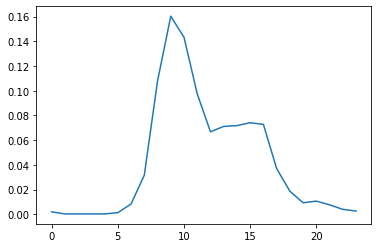

In [138]:
# Display that in a plot using Panda's built-in graphics library

cream_percents.plot();

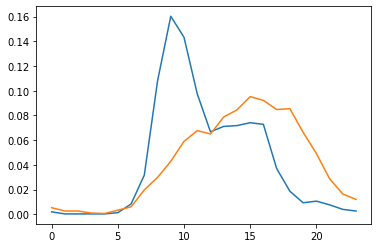

In [140]:
# Display products both together.

cream_percents.plot();
fro_percents.plot();

**2. crosstab**

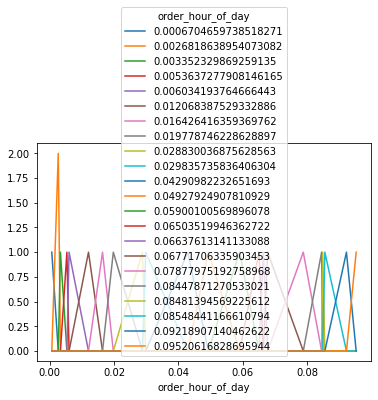

In [144]:
# You can get the same result using the `pd.crosstab` method
# But it generates a legend and requires fewer steps

ct = pd.crosstab(cream_percents, fro_percents)
ct.plot()

**3. Pivot Table**

In [ ]:
# and again, but with the `pd.pivot_table` method


**4. melt**

In [ ]:
# Finally, what if we want to reshape the table?
# First, let's display it in `wide` format.


In [ ]:
# Now let's convert from wide to tidy format.
columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }
